In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0,799,800)

In [4]:
y = torch.sin(x*2*3.1416/40)

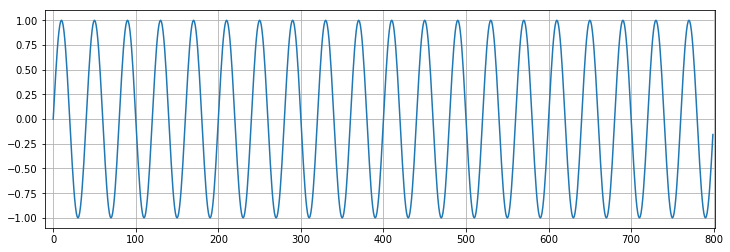

In [5]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [6]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

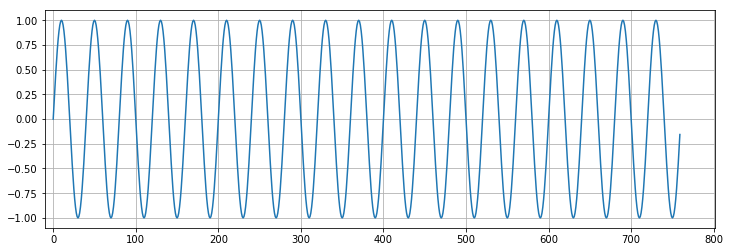

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [8]:
# Chop sequences to combinations of one windown sized sequence and one prediction point to the future
def input_data(seq,ws):
    
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    
    return out

In [9]:
window_size = 40 # equal to test size

train_data = input_data(train_set,window_size)

In [10]:
len(train_data)    # 800 total train data - test size - window size

720

In [11]:
train_data

[(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
           7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
           1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
           7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
          -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
          -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
          -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
          -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
  tensor([1.4480e-05])),
 (tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
           8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
           9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
           5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
          -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01

In [12]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [13]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [14]:
class LSTM(nn.Module):
    
    def __init__(self,input_size=1,hidden_size=50,out_size=1):      # 50 is an arbitrary number
        
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Hidden state & cell state
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]

In [15]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [16]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [17]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


In [18]:
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422032475471497,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 0.9999999403953552,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch 0 Loss: 0.0921287089586258
Performance on test range: 0.6071590781211853


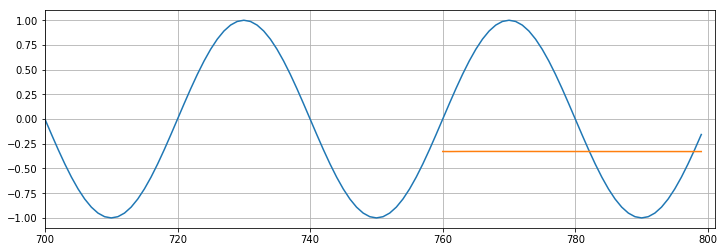

Epoch 1 Loss: 0.06506764143705368
Performance on test range: 0.565098762512207


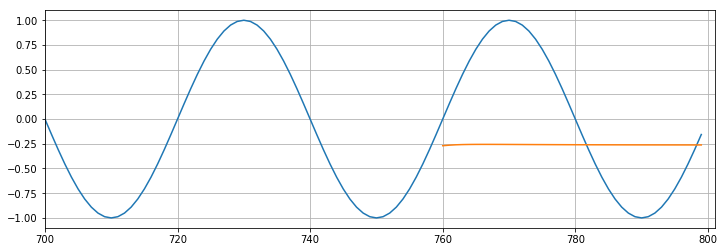

Epoch 2 Loss: 0.041980478912591934
Performance on test range: 0.5199716687202454


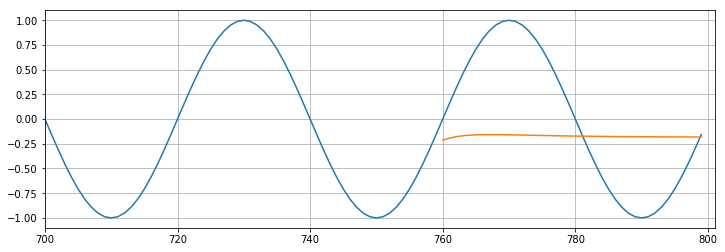

Epoch 3 Loss: 0.017842764034867287
Performance on test range: 0.42209962010383606


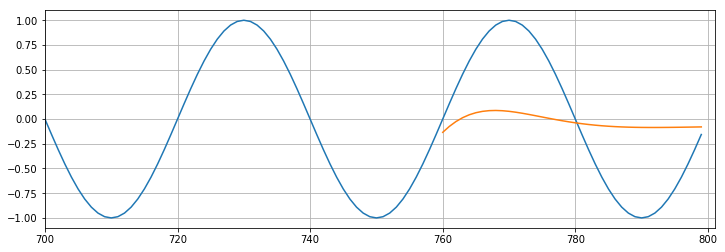

Epoch 4 Loss: 0.0028871013782918453
Performance on test range: 0.16624100506305695


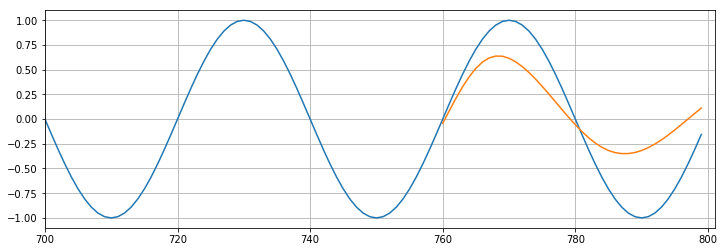

Epoch 5 Loss: 0.00032007365371100605
Performance on test range: 0.03055436909198761


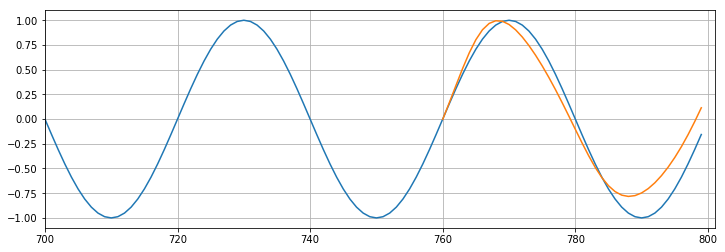

Epoch 6 Loss: 0.00012969138333573937
Performance on test range: 0.014990190975368023


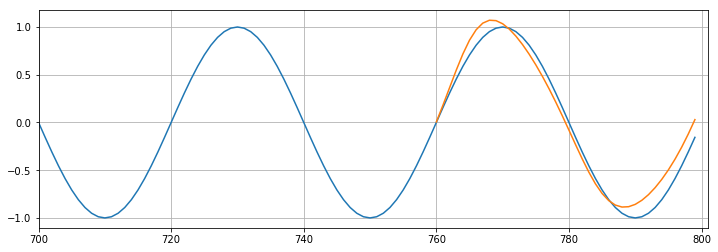

Epoch 7 Loss: 0.00012006733595626429
Performance on test range: 0.011856673285365105


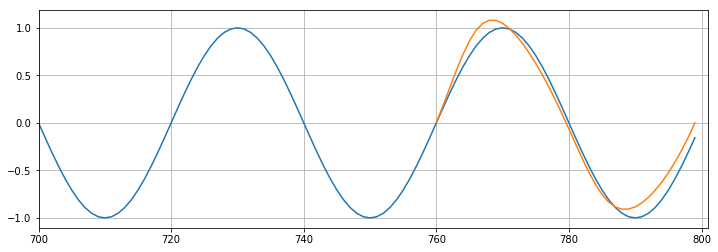

Epoch 8 Loss: 0.00012655690079554915
Performance on test range: 0.010163797065615654


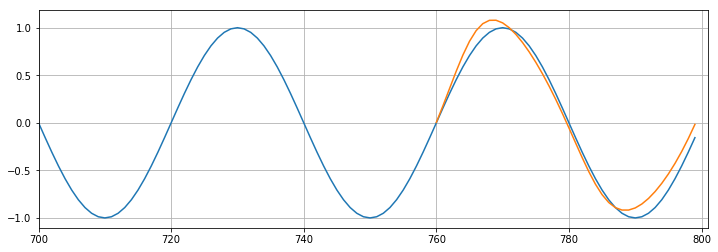

Epoch 9 Loss: 0.00013195407518651336
Performance on test range: 0.008897597901523113


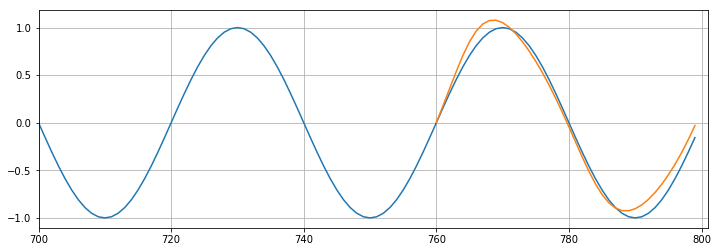

In [20]:
epochs = 10
future = 40

for i in range(epochs):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()  # Grab the last window sized training set to predict
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Performance on test range: {loss}')
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [21]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y,window_size)
len(all_data)

760

In [23]:
import time
start_time = time.time()

for i in range(epochs):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")

total_time = time.time() - start_time
print(total_time/60)

Epoch 0 Loss: 0.0001345026830676943
Epoch 1 Loss: 0.00013458322791848332
Epoch 2 Loss: 0.00013279174163471907
Epoch 3 Loss: 0.00012966524809598923
Epoch 4 Loss: 0.00012561320909298956
Epoch 5 Loss: 0.00012097688886569813
Epoch 6 Loss: 0.00011599724530242383
Epoch 7 Loss: 0.0001108607102651149
Epoch 8 Loss: 0.0001057080808095634
Epoch 9 Loss: 0.00010063022637041286
Epoch 10 Loss: 9.569629764882848e-05
Epoch 11 Loss: 9.094662527786568e-05
Epoch 12 Loss: 8.641256863484159e-05
Epoch 13 Loss: 8.210862870328128e-05
Epoch 14 Loss: 7.80364716774784e-05
2.3171512484550476


# Forcast Into Unknown Future

In [25]:
preds = y[-window_size:].tolist()

for i in range(future):
    
    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

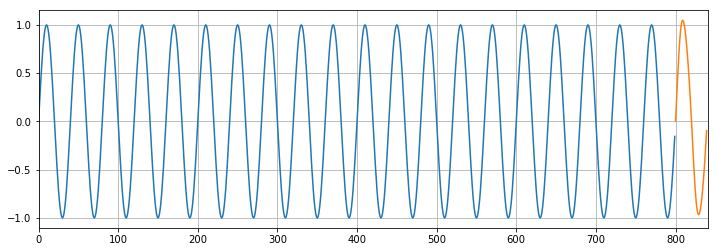

In [26]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
# Plotting Forecast
plt.plot(range(800,800+future),preds[window_size:])
plt.show()

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/TimeSeriesData/Alcohol_Sales.csv",
                index_col=0,parse_dates=True)    # use the column 0 as index and convert it to a date variable

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [5]:
len(df)

325

In [6]:
df = df.dropna()

In [7]:
len(df)

325

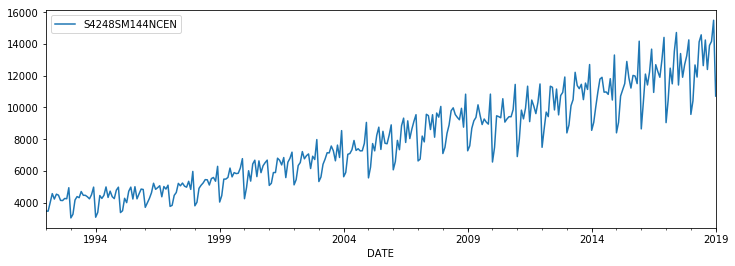

In [8]:
df.plot(figsize=(12,4))

In [9]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [10]:
y = df['S4248SM144NCEN'].values.astype(float)

In [11]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [12]:
test_size = 12

In [13]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [14]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [17]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [18]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [19]:
# train_norm

In [20]:
# training_size = len(y) - test_size - window_size

In [21]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [22]:
# train_norm

In [23]:
window_size = 12

In [24]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]    # One step ahead to the future
        out.append((window,label))
    return out

In [25]:
train_data = input_data(train_norm,window_size)

In [26]:
len(train_data)

301

In [27]:
325-12-12

301

In [28]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

In [29]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [30]:
torch.manual_seed(101)

model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [31]:
model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [32]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch} Loss {loss.item()}')

total_time = time.time() - start_time
print(total_time/60)

# Loss is small due to normalized data

Epoch 0 Loss 0.25314345955848694
Epoch 1 Loss 0.375238835811615
Epoch 2 Loss 0.3901209831237793
Epoch 3 Loss 0.34949684143066406
Epoch 4 Loss 0.33077895641326904
Epoch 5 Loss 0.3323071599006653
Epoch 6 Loss 0.3266769051551819
Epoch 7 Loss 0.3207703232765198
Epoch 8 Loss 0.30651766061782837
Epoch 9 Loss 0.2951701283454895
Epoch 10 Loss 0.2691394090652466
Epoch 11 Loss 0.25979354977607727
Epoch 12 Loss 0.24600136280059814
Epoch 13 Loss 0.22227926552295685
Epoch 14 Loss 0.18593451380729675
Epoch 15 Loss 0.1844586431980133
Epoch 16 Loss 0.17432963848114014
Epoch 17 Loss 0.2582164704799652
Epoch 18 Loss 0.22418145835399628
Epoch 19 Loss 0.2312823086977005
Epoch 20 Loss 0.1978532373905182
Epoch 21 Loss 0.19108842313289642
Epoch 22 Loss 0.21625033020973206
Epoch 23 Loss 0.16606999933719635
Epoch 24 Loss 0.14603713154792786
Epoch 25 Loss 0.1241547167301178
Epoch 26 Loss 0.09579802304506302
Epoch 27 Loss 0.006728533189743757
Epoch 28 Loss 0.0027485694736242294
Epoch 29 Loss 0.02162378840148449


In [34]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    
    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

In [35]:
preds[window_size:]   # Normalized predictions

[0.21192799508571625,
 0.6580734848976135,
 0.5224471688270569,
 0.8876904845237732,
 1.2070956230163574,
 0.42144814133644104,
 0.8515653610229492,
 0.6366599202156067,
 0.6598879098892212,
 0.7084020972251892,
 0.8061954379081726,
 0.14478516578674316]

In [36]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [37]:
# Denormalization
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

In [38]:
true_predictions

array([[10120.17280725],
       [12729.90084991],
       [11936.55471405],
       [14073.04548922],
       [15941.40584683],
       [11345.76090275],
       [13861.7315793 ],
       [12604.6422033 ],
       [12740.5143289 ],
       [13024.29806772],
       [13596.34021404],
       [ 9727.42082727]])

In [39]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [40]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [41]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [42]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

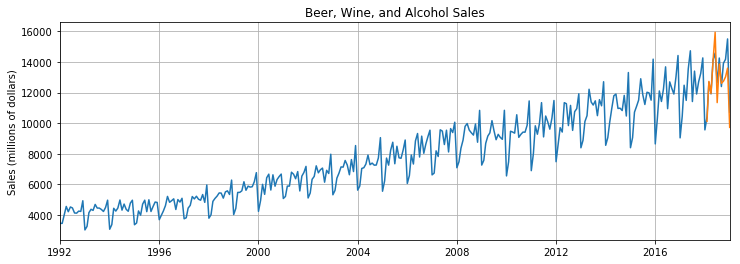

In [43]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

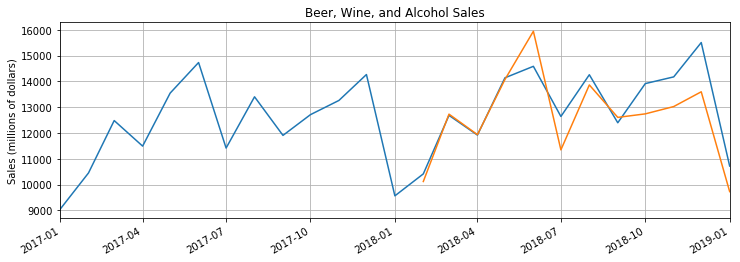

In [44]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [45]:
# Forecast into an unknown future

epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.01885264
Epoch:  2 Loss: 0.02020651
Epoch:  3 Loss: 0.01598387
Epoch:  4 Loss: 0.01189850
Epoch:  5 Loss: 0.00782302
Epoch:  6 Loss: 0.00641707
Epoch:  7 Loss: 0.00579177
Epoch:  8 Loss: 0.00587801
Epoch:  9 Loss: 0.00647989
Epoch: 10 Loss: 0.00918512
Epoch: 11 Loss: 0.00416980
Epoch: 12 Loss: 0.00763252
Epoch: 13 Loss: 0.00700081
Epoch: 14 Loss: 0.00494323
Epoch: 15 Loss: 0.00404025
Epoch: 16 Loss: 0.00376586
Epoch: 17 Loss: 0.00407913
Epoch: 18 Loss: 0.00336813
Epoch: 19 Loss: 0.00341231
Epoch: 20 Loss: 0.00151583
Epoch: 21 Loss: 0.00092687
Epoch: 22 Loss: 0.00133659
Epoch: 23 Loss: 0.00185117
Epoch: 24 Loss: 0.00273244
Epoch: 25 Loss: 0.00282931
Epoch: 26 Loss: 0.00256142
Epoch: 27 Loss: 0.00310208
Epoch: 28 Loss: 0.00156982
Epoch: 29 Loss: 0.00190969
Epoch: 30 Loss: 0.00109570
Epoch: 31 Loss: 0.00001636
Epoch: 32 Loss: 0.00208319
Epoch: 33 Loss: 0.00333869
Epoch: 34 Loss: 0.00220000
Epoch: 35 Loss: 0.00232922
Epoch: 36 Loss: 0.00144007
Epoch: 37 Loss: 0.00098414
E

In [46]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    
    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

In [47]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [48]:
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [11375.8957049 ],
       [13100.90753615],
       [11780.26825148],
       [14360.26062441],
       [15030.37223002],
       [13087.57118103],
       [14447.11290762],
       [13004.63835955],
       [14328.7662774 ],
       [15154.50214794],
       [15761.95812458],
       [11852.07090196]])

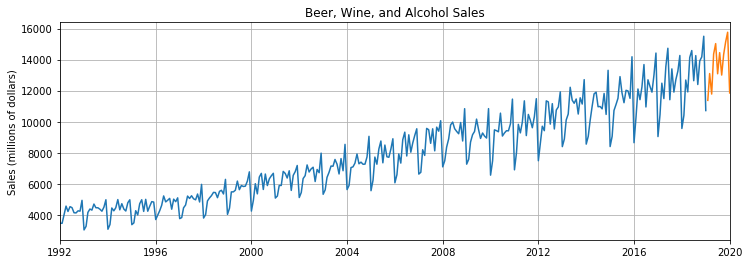

In [49]:
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

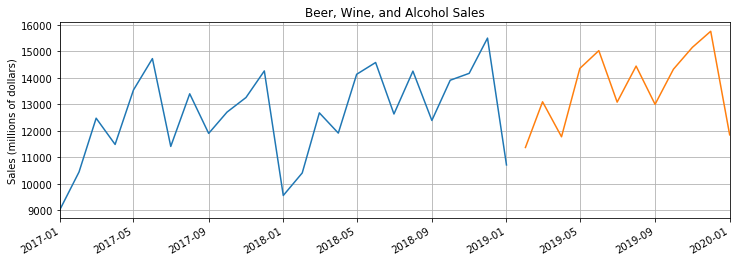

In [50]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()